In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import load_preprocessed_file,get_monthly_averages,\
                  compute_anomalies, plot_anomaly_graph

In [2]:
BUOYNO=44014
df=load_preprocessed_file(BUOYNO)
df = df[df.index.map(lambda x:x.year)!=1990] # drop 1990, which only has october onward
df.head(6)

,ATMP,WTMP
timestamp,,
1991-01-01 00:00:00,8.3,12.9
1991-01-01 01:00:00,8.3,12.9
1991-01-01 02:00:00,8.5,12.9
1991-01-01 03:00:00,8.3,12.9
1991-01-01 04:00:00,8.4,12.9
1991-01-01 05:00:00,8.0,12.8


In [3]:
monthly=get_monthly_averages(df)
monthly.head()

,ATMP,WTMP
1991-01,8.991240,11.132749
1991-02,9.912668,14.176084
1991-03,10.809409,13.746226
1991-04,13.219441,13.671608
1991-05,17.561238,17.490995


In [4]:
all_months_air = compute_anomalies(monthly, 'ATMP')
all_months_air.head()


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Jan,1.046149,0.371801,0.862883,3.028918,1.216969,-1.074321,-1.356337,NaN,1.135153,-0.035015,...,-1.171047,-2.241291,-2.338097,NaN,1.060108,-0.552337,0.045635,0.749257,2.354775,-0.513916
Feb,2.175333,-0.017858,-2.224330,-0.992873,-1.370871,-1.776069,0.255292,NaN,0.206958,1.877262,...,-0.815949,-2.410648,-0.296418,4.367713,0.698314,0.574043,-4.026471,0.481514,2.427889,2.022365
Mar,2.218000,-0.786795,-1.941612,-0.736556,0.201888,-1.943369,1.090274,NaN,-0.803787,1.004286,...,-0.200536,-0.389231,-0.097389,NaN,-0.970365,0.183086,0.857040,2.771849,0.013869,-1.443021
Apr,1.719292,-1.633111,-2.763899,1.798038,1.107236,-1.581544,-1.379784,-0.304861,-0.430456,1.006083,...,0.183444,0.506762,1.564087,NaN,-0.052103,0.012036,1.855283,0.621439,1.948454,-0.884411
May,2.030271,-3.885011,-0.372398,-0.338712,-0.506421,-1.168894,-0.456476,-1.339196,-1.553713,0.540168,...,1.048705,1.229878,1.753844,NaN,0.163250,1.183837,1.995313,-0.408656,1.949117,2.193087


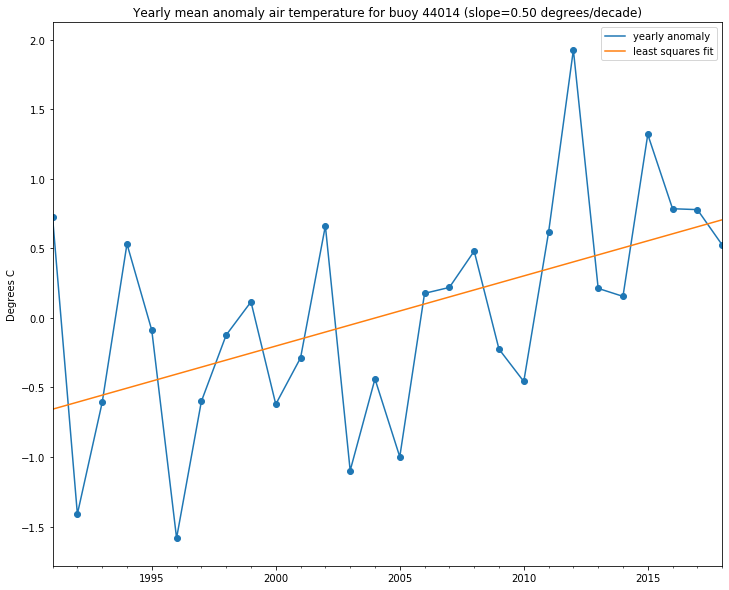

In [5]:
air_slope = plot_anomaly_graph(BUOYNO, 'air', all_months_air)


In [6]:
all_months_water = compute_anomalies(monthly, 'WTMP')
all_months_water.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Jan,-0.749434,-1.201237,-1.529751,2.328830,NaN,-2.772673,-1.771614,NaN,-1.320363,NaN,...,-0.537101,-1.686932,-2.049876,2.064836,NaN,0.592687,1.285693,1.673537,2.442010,1.956683
Feb,3.895683,-1.639994,-1.913734,-2.549979,NaN,-2.213271,-1.997298,NaN,-0.812870,3.969134,...,-1.053292,-1.371255,-1.873766,2.832099,NaN,1.589360,-0.309865,0.404060,1.251987,-0.312431
Mar,4.373736,-1.243047,-2.359429,-2.102679,NaN,-1.939437,0.199754,NaN,0.077649,2.771259,...,-0.121401,-1.973987,-1.009069,NaN,NaN,0.417523,2.623866,1.833835,0.880148,-1.414426
Apr,3.255023,-1.798783,-3.061030,0.035352,NaN,-2.513846,-0.778665,-0.838052,-1.061279,4.942545,...,-0.133842,0.298506,0.887762,NaN,NaN,-0.283066,2.368233,1.497899,1.370006,-0.776474
May,3.012053,-4.782716,-0.124556,NaN,NaN,-1.249338,-0.407416,-1.824130,-2.700207,0.624762,...,0.662941,1.425424,2.258205,NaN,NaN,1.024826,1.988309,-0.191980,2.222741,2.204707


Unable to fit a line
Creating a line just using two years on each endpoint (1991 and 1992, 2017 and 2018)


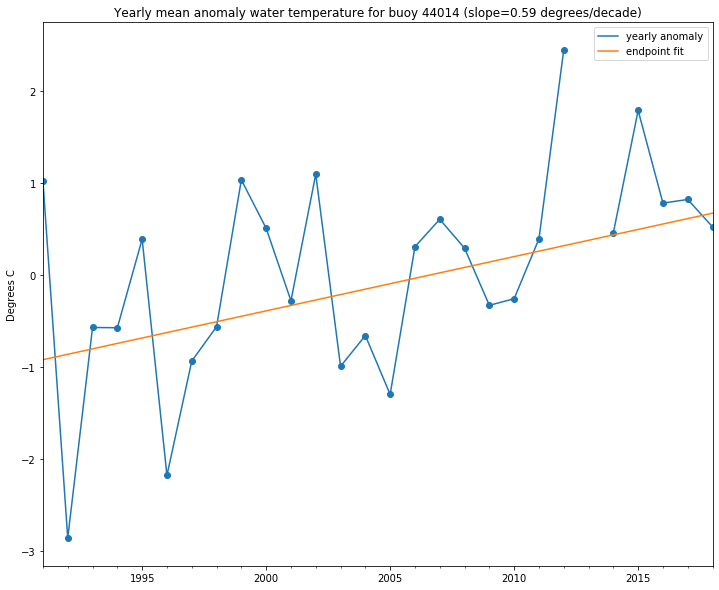

In [7]:
water_slope = plot_anomaly_graph(BUOYNO, 'water', all_months_water)


In [8]:
from dataworkspaces.kits.jupyter import NotebookLineageBuilder
with NotebookLineageBuilder('../results',
                            run_description="compute air and water anomaly for buoy %s" % BUOYNO)\
       .with_parameters({'buoy':BUOYNO})\
       .with_input_path('../intermediate-data/processed_%s.csv.gz'%BUOYNO)\
       .eval() as lineage:
    lineage.write_results({'air_slope':round(air_slope,3),
                          'water_slope':round(water_slope, 3),
                          'units':'degrees C per decade'})
print("Results:")
print("  Air slope:   %.3f degrees C per decade" % air_slope)
print("  Water slope: %.3f degrees C per decade" % water_slope)

Wrote results to results:results.json
Results:
  Air slope:   0.504 degrees C per decade
  Water slope: 0.590 degrees C per decade
